<a href="https://colab.research.google.com/github/ginttone/multi_machinelearning/blob/master/Single_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensorflow 설치

In [1]:
import tensorflow as tf

!python -m pip install -u tensorflow

pc성능(GPU)에 따라 영향이 크다.

In [2]:
tf.__version__

'2.5.0'

## 기존방식 1960's 딥러닝

성공시 보상 크기는 x조건, 실행은 y조건

In [3]:
x_data = [[0,0],[1,0],[0,1],[1,1]]
y_data = [[0],[1],[1],[1]]

type(x_data),type(y_data)

(list, list)

### type이 list 인 것은 tensorflow 에서 사용 못하기 때분에 numpy로 바꾸어준다

In [4]:
import numpy as np

x_train = np.array(x_data)
y_train = np.array(y_data)
x_train.shape , y_train.shape

((4, 2), (4, 1))

기존 머신러닝은 데이터 틀을 보고 자동적으로 판단을 했었다. 프리딕트 할 때 학습한것을 바탕으로 했었다. 

### 하지만, 딥러닝의 경우에는  인풋과 아웃풋을 사용자가 넣어줘야 한다. 그 전체 틀을 모델이라고 한다.

모델 구성하는 원리

1. 담을 그릇 들기 (model)



In [5]:
model=tf.keras.models.Sequential()

2. 해당 코너에서 원하는 것 담기 (tf.keras.Input)

```
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)
```

  * 얼만큼 그릇에 담을지 정해줌(x)

  shape = ( 첫번째 넣는 갯수의 모양은 열의갯수 ,  )



In [6]:
model.add(tf.keras.Input(shape=(2,)))

 * 뷔페layers 에서 많은 코너 중 Dense에서 가져오기.(tf.keras.layers.Dense)
 
 ```
 tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
 ```

 클레시피케이션 처럼 기능을 넣어 줄 때는 Dense : 1개인지 2개인지 3개인지 ... n개인지 명기하기(y)

In [7]:
model.add(tf.keras.layers.Dense(1))

* 이제 가져온 것을 포크로 먹을래 젓가락으로 먹을래 ? 등  먹기 편하게 도구 줘

optimizer은 도구로 얼만큼 찍는지 횟수 알려줌

loss 하나의 음식을 어디를 찔렀을때 먹기편한 위치인지 숫자로 나타내줌 (중앙 = 1, 끝 = 0)

In [8]:
model.compile(optimizer='sgd',loss='mse')

3. 모델 완료 되었기 때문에 fit해준다 (교육완료)

In [9]:
model.fit(x_train,y_train)

1/1 [==============================] - 0s 254ms/step - loss: 3.0378


### 아웃풋은 predict 한다.

In [10]:
model.predict([[0,1]]) # epochs = 1

array([[-1.1957254]], dtype=float32)

* model.get_weights()

리니어 레그레이션의 x의 개수(weights), y의 절편(기울기,bias) 처럼 나온다.

y = ax + bx + c

y = -0.13575263x  + -1.2247406x + 0.02901516

In [11]:
model.get_weights()

[array([[-0.13575263],
        [-1.2247406 ]], dtype=float32), array([0.02901516], dtype=float32)]

### 모델을 그래프로 찍기(tf.keras.utils.plot_model)

```
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)
```


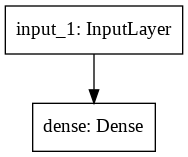

In [12]:
tf.keras.utils.plot_model(model)

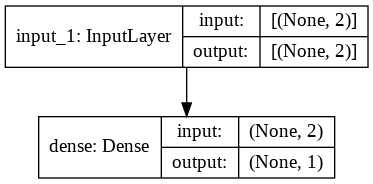

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

## 현재 딥러닝


In [14]:
import numpy as np

xx_train = np.array(x_data)
yy_train = np.array(y_data)

In [15]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=(2,)))
model2.add(tf.keras.layers.Dense(1))

model2.compile(optimizer='sgd',loss='mse')

In [25]:
model2.fit(xx_train, yy_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0662
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0661
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 13/500
1/1 [==============================] - 0s 3ms/s

In [23]:
model2.predict([[0,1]]) # epochs = 50

array([[0.8042184]], dtype=float32)

In [26]:
model2.predict([[0,1]]) # epochs = 500

array([[0.75613916]], dtype=float32)